In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import dateutil.relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
sales = pd.read_csv('sales_anonymized.csv').drop(columns=['Unnamed: 0'])
sales.date = pd.to_datetime(sales.date)
sales

,date,sales,state,customer
0,2017-06-01,-468.75,OK,Customer 653
1,2017-06-01,4687.50,OK,Customer 653
2,2017-06-01,412.80,OK,Customer 653
3,2017-06-01,0.00,NC,Customer 628
4,2017-06-02,-2221.95,MA,Customer 149
5,2017-06-02,409.50,other,Customer 74
6,2017-06-02,421.50,other,Customer 74
7,2017-06-02,418.50,other,Customer 74
8,2017-06-02,427.50,other,Customer 74
9,2017-06-02,418.50,other,Customer 74


In [14]:
sales.sum() # check against Total at bottom of 'sales_by_customer_detail.xlsx' — should be the same number

sales    13679202.9
dtype: float64

In [15]:
# build a dataframe containing sales data for the past num_months (this year)
num_months = 3
# set forecsat_day to the date immediately following the most recent date in sales
forecast_day = pd.to_datetime(sales.iloc[len(sales.index) - 1].date) + pd.Timedelta(days=1)
print(forecast_day)
#
months = pd.DataFrame(columns=['state'])
for i in range(1, num_months + 1):
    month_ago = forecast_day - dateutil.relativedelta.relativedelta(months=i)
    # use mask to isolate sales between month starting i months ago and ending i - 1 months ago
    mask = (sales.date >= month_ago) & (sales.date < forecast_day - dateutil.relativedelta.relativedelta(months=i-1))
    # group sales by state and rename column appropriately 
    month_sales = sales.loc[mask].groupby(['state']).sum()
    month_sales = month_sales.rename(columns={'sales': str(i) + ' months ago'})
    # add the column for this month to the months DataFrame
    months = months.merge(month_sales, how='outer', on='state')

# after exiting this loop, we now have a DataFrame with monthly sales for the past [num_months] months
this_year_months = months
this_year_months.head()

2019-06-01 00:00:00


,state,1 months ago,2 months ago,3 months ago
0,AN,3591.00,3528.75,NaN
1,AS,14814.00,3678.75,7.50
2,AZ,11901.75,23035.50,15196.50
3,CA,123650.25,112235.25,288403.65
4,CO,7182.00,NaN,NaN


In [16]:
this_year_months.sum()

state           ANASAZCACODADCEEEYFLHIIAIDILINISKYMAMDMEMINCND...
1 months ago                                          1.11158e+06
2 months ago                                          1.11682e+06
3 months ago                                               931446
dtype: object

In [17]:
# build a dataframe containing sales data for the past num_months, minus one year
# very similar process to building this_year_months (see above)
forecast_day = forecast_day - pd.Timedelta(days=365)
print(forecast_day)
months = pd.DataFrame(columns=['state'])
for i in range(1, num_months + 1):
    month_ago = forecast_day - dateutil.relativedelta.relativedelta(months=i)
    mask = (sales.date >= month_ago) & (sales.date < forecast_day - dateutil.relativedelta.relativedelta(months=i-1))
    month_sales = sales.loc[mask].groupby(['state']).sum()
    month_sales = month_sales.rename(columns={'sales': 'one year and ' + str(i) + ' months ago'})
    months = months.merge(month_sales, how='outer', on='state')
    
last_year_months = months
last_year_months

2018-06-01 00:00:00


,state,one year and 1 months ago,one year and 2 months ago,one year and 3 months ago
0,AZ,27195.75,3600.00,32207.10
1,CA,46178.85,216350.85,157043.85
2,CO,611.25,6645.00,NaN
3,CT,14596.50,21810.30,0.00
4,DC,58500.00,14654.25,NaN
5,DE,14115.00,NaN,NaN
6,EY,3528.75,3450.00,NaN
7,FL,79183.50,176197.80,67657.50
8,GA,7057.50,NaN,21089.85
9,ID,39676.50,167748.45,33802.50


In [18]:
last_year_months.sum()

state                        AZCACOCTDCDEEYFLGAIDILINKYLAMAMDMEMNMTNCNHNJNV...
one year and 1 months ago                                               640110
one year and 2 months ago                                          1.66106e+06
one year and 3 months ago                                               722099
dtype: object

In [19]:
YOY_raw = this_year_months.merge(last_year_months, on='state', how='outer')
YOY_raw = YOY_raw.replace(0, np.NaN)
YOY = pd.DataFrame()
YOY_raw

,state,1 months ago,2 months ago,3 months ago,one year and 1 months ago,one year and 2 months ago,one year and 3 months ago
0,AN,3591.00,3528.75,NaN,NaN,7539.00,NaN
1,AS,14814.00,3678.75,7.50,NaN,NaN,NaN
2,AZ,11901.75,23035.50,15196.50,27195.75,3600.00,32207.10
3,CA,123650.25,112235.25,288403.65,46178.85,216350.85,157043.85
4,CO,7182.00,NaN,NaN,611.25,6645.00,NaN
5,DA,10848.15,13852.50,NaN,NaN,10586.25,NaN
6,DC,47365.95,45709.80,NaN,58500.00,14654.25,NaN
7,EE,10968.90,NaN,NaN,NaN,NaN,NaN
8,EY,4082.25,3528.75,NaN,3528.75,3450.00,NaN
9,FL,111504.45,155843.70,98454.00,79183.50,176197.80,67657.50


In [20]:
# find projected sales increase (as ratio)

for index, row in YOY_raw.iterrows():
    # populate array of ratios
    months_ratios = []
    for i in range(1, num_months + 1):
        month_ratio = row[str(i) + ' months ago'] / row['one year and ' + str(i) + ' months ago']
        # if any ratio is NaN (i.e. on of the months didn't have any sales), then default the avg_sales_increase to 1
        if (np.isnan(month_ratio)):
            months_ratios = [1]
            break
        months_ratios.append(month_ratio)
            
    avg_sales_increase = np.mean(months_ratios)
    
    YOY_row = {'state': row.state}
    for i, ratio in enumerate(months_ratios):
        YOY_row['month ' + str(i + 1)] = ratio
    YOY_row['projected sales increase'] = avg_sales_increase
    YOY = YOY.append(YOY_row, ignore_index=True)
    
YOY = YOY.fillna({'projected sales increase': 1})
print(YOY.to_string())

      month 1  projected sales increase  state   month 2    month 3
0    1.000000                  1.000000     AN       NaN        NaN
1    1.000000                  1.000000     AS       NaN        NaN
2    0.437633                  2.436073     AZ  6.398750   0.471837
3    2.677638                  1.677619     CA  0.518765   1.836453
4    1.000000                  1.000000     CO       NaN        NaN
5    1.000000                  1.000000     DA       NaN        NaN
6    1.000000                  1.000000     DC       NaN        NaN
7    1.000000                  1.000000     EE       NaN        NaN
8    1.000000                  1.000000     EY       NaN        NaN
9    1.408178                  1.249281     FL  0.884482   1.455182
10   1.000000                  1.000000     HI       NaN        NaN
11   1.000000                  1.000000     IA       NaN        NaN
12   2.709278                  1.842923     ID  0.111815   2.707677
13   1.000000                  1.000000     IL  

In [21]:
# TODO: drop observations if there aren't at least 2 not np.isnan() values 

In [22]:
forecast_day = pd.to_datetime(sales.iloc[len(sales.index) - 1].date) + pd.Timedelta(days=1)
# loop over the below for months_to_project
forecast = pd.DataFrame(columns=['state'])
forecast.state = sales.state.drop_duplicates()

for i in range (0, num_months):
    year_ago_BOM = forecast_day - dateutil.relativedelta.relativedelta(months=12 - i)
    year_ago_EOM = forecast_day - dateutil.relativedelta.relativedelta(months=11 - i)
    mask = (sales.date >= year_ago_BOM) & (sales.date < year_ago_EOM)
    year_ago_sales = sales.loc[mask].groupby(['state']).sum()

    month_forecast = year_ago_sales.merge(YOY, how='outer', on='state')
    forecast_column = []
    for index, row in month_forecast.iterrows():
        state_forecast = row['sales'] * row['projected sales increase']
        forecast_column.append(state_forecast)
    month_forecast['projected sales for ' + 
                                            str(forecast_day + dateutil.relativedelta.relativedelta(months=i)).split(' ')[0]] = pd.Series(forecast_column, index=month_forecast.index)
    month_forecast = month_forecast.rename(columns={'sales':'sales in ' +
                                                    str(year_ago_BOM).split(' ')[0]})
    forecast = forecast.merge(month_forecast, on='state', how='outer')

# end loop
# drop all columns with 'month' or 'projected sales increase' in their name, also drop duplicates of 'projected sales increase' column
forecast = forecast.drop(columns = list(forecast.filter(regex='month')))
forecast = forecast.drop(columns = list(forecast.filter(regex='projected sales increase')))
forecast = forecast.append(forecast.sum(numeric_only=True), ignore_index=True)
# NOTE: .shape[0] returns the row count, whereas .shape[1] returns the column count, consistent with axis=0 vs. axis=1
forecast.at[forecast.shape[0] - 1, 'state'] = 'Total'
forecast

# set index for forecast as state, then add columns for next 2 months (3 months total) by 
# creating columns (pd.Series) containing projections for each month
# and then add the columns to forecast (vector operations...)

,state,sales in 2018-06-01,projected sales for 2019-06-01,sales in 2018-07-01,projected sales for 2019-07-01,sales in 2018-08-01,projected sales for 2019-08-01
0,OK,NaN,NaN,3528.75,3.528750e+03,4194.00,4.194000e+03
1,NC,33946.65,6.150697e+04,32875.50,5.956618e+04,40926.00,7.415265e+04
2,MA,22104.00,1.364974e+04,47324.25,2.922383e+04,49256.25,3.041688e+04
3,other,120908.25,2.389197e+05,71910.00,1.420972e+05,50140.50,9.907971e+04
4,CA,90826.50,1.523722e+05,98065.50,1.645165e+05,171034.05,2.869299e+05
5,VA,7057.50,7.057500e+03,25664.25,2.566425e+04,33868.50,3.386850e+04
6,IL,24657.75,2.465775e+04,25139.25,2.513925e+04,17750.25,1.775025e+04
7,AZ,NaN,NaN,7357.50,1.792341e+04,7839.00,1.909638e+04
8,NJ,11549.25,1.022110e+04,22135.50,1.958993e+04,31923.45,2.825228e+04
9,CT,143739.00,1.437390e+05,22135.50,2.213550e+04,26627.25,2.662725e+04


In [26]:
forecast.loc[~forecast.state.str.match('Total', na=False)].sum()

sales in 2018-06-01               9.845288e+05
projected sales for 2019-06-01    1.805019e+06
sales in 2018-07-01               9.332280e+05
projected sales for 2019-07-01    1.312076e+06
sales in 2018-08-01               1.013927e+06
projected sales for 2019-08-01    1.949826e+06
dtype: float64

In [27]:
forecast.index

RangeIndex(start=0, stop=68, step=1)

In [28]:
forecast.to_excel('anonymized forecast '+ str(forecast_day).split(' ')[0] + '.xlsx')

In [29]:
# GET PERCENT INCREASE BETWEEN TOTAL COLS FOR EACH MONTH, THEN APPLY TO ACTUAL SALES IN EACH OF THOSE MONTHS TO GET 
# PROJECTED OVERALL SALES

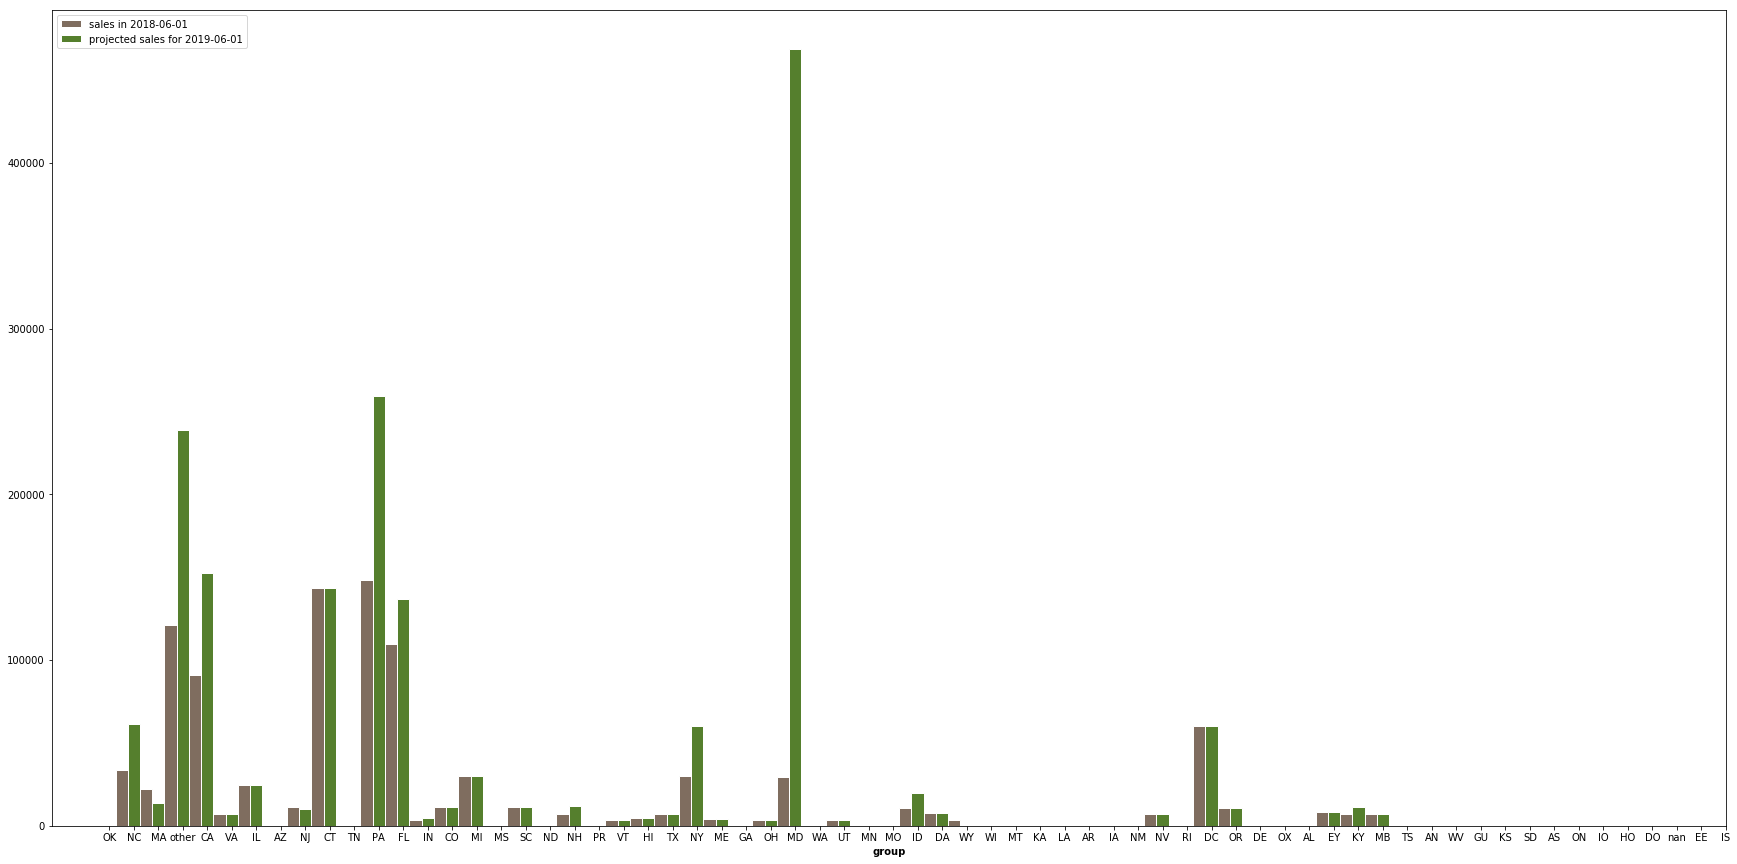

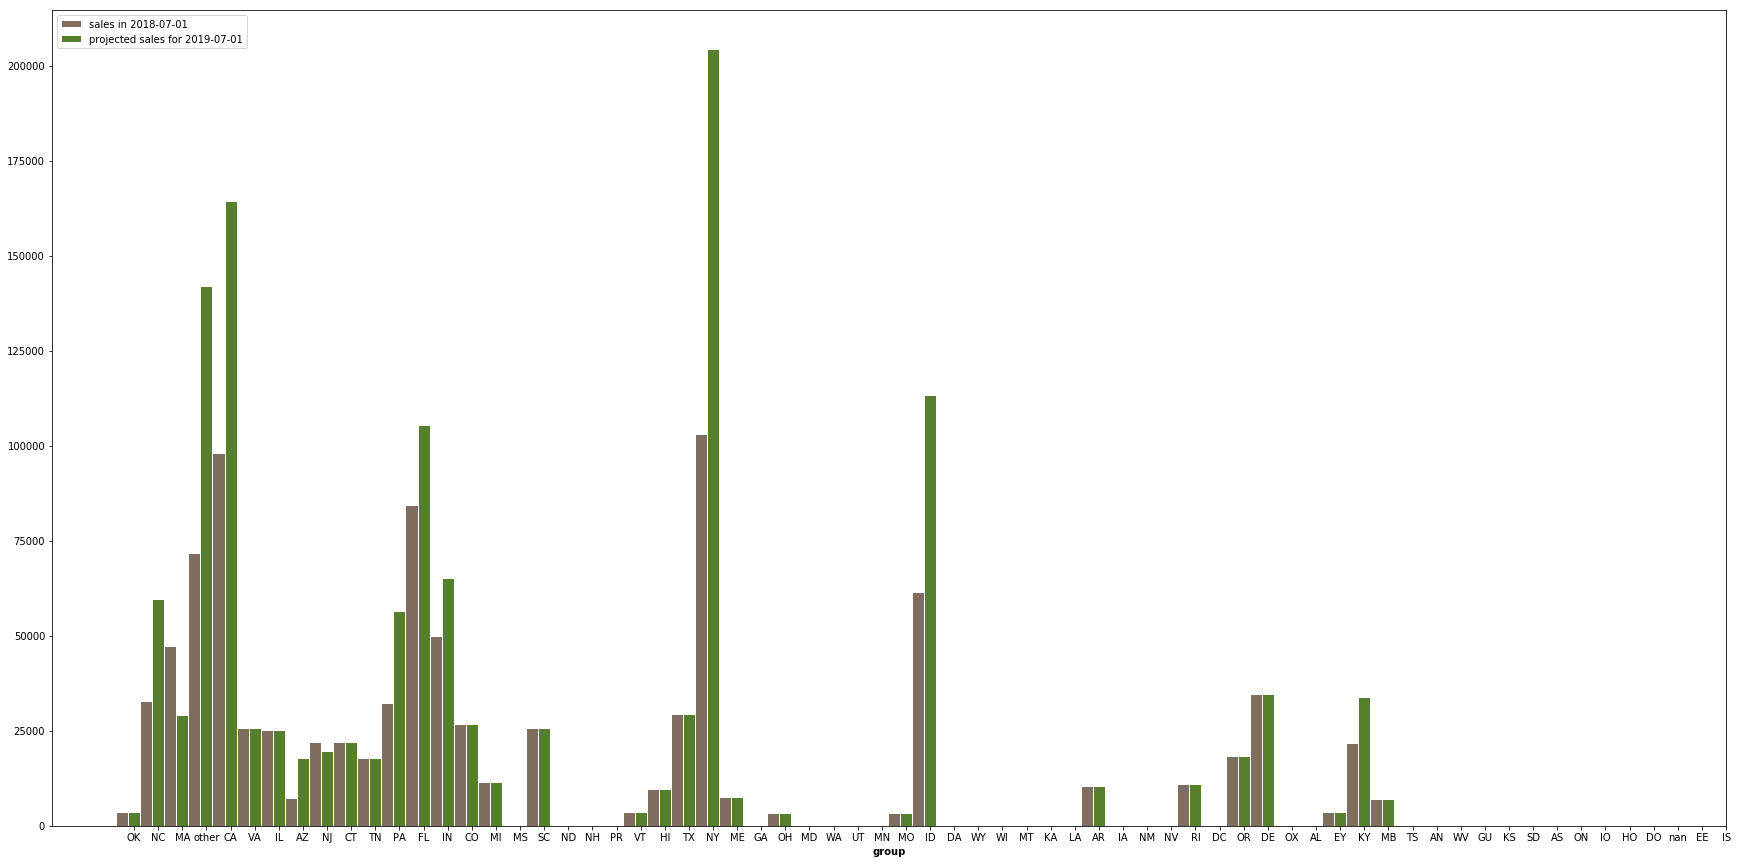

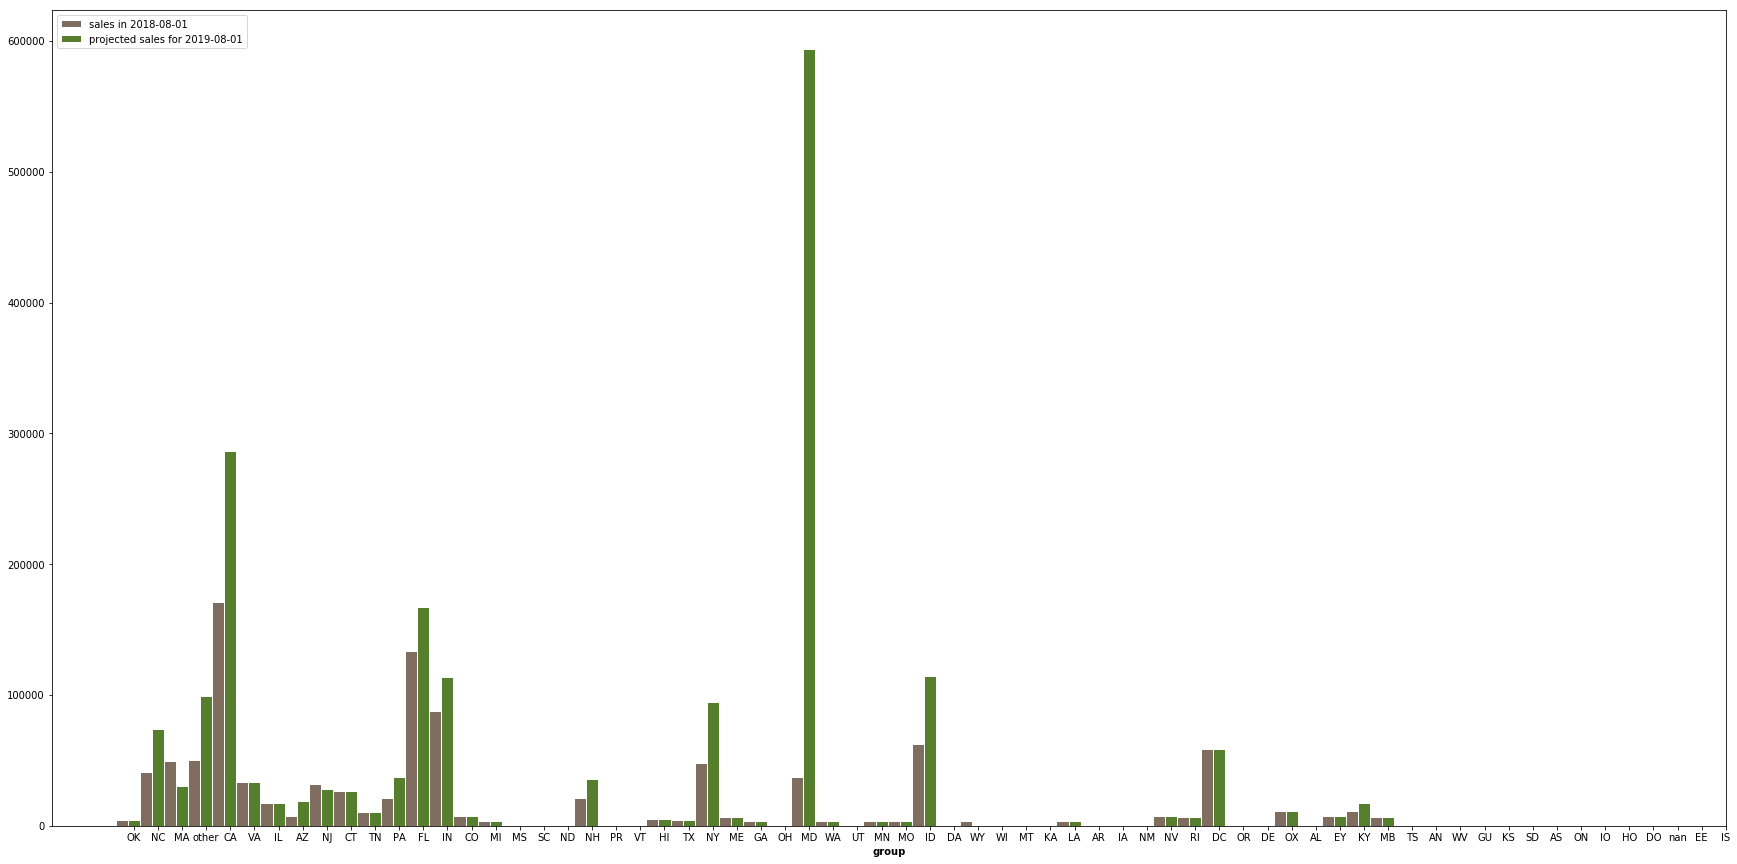

<Figure size 2160x1080 with 0 Axes>

In [32]:
#drop "Total row from forecast"
forecast = forecast.loc[~forecast.state.str.match('Total', na=False)]

# loop [num_months] times to generate graphs for each  month to be predicted, starting at 2nd column (skip 'state' column)
for i in range(1, len(forecast.columns), 2):

    year_ago_sales_str = forecast.columns[i]
    projected_sales_str = forecast.columns[i + 1]
    # set width of bar
    barWidth = .5

    # set height of bar
    bars1 = forecast[year_ago_sales_str].tolist()
    bars2 = forecast[projected_sales_str].tolist()

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label=year_ago_sales_str)
    plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label=projected_sales_str)

    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], forecast.state.tolist())

    # Create legend & Show graphic
    plt.legend()
    plt.rcParams['figure.figsize'] = (30,15)
    plt.show()
    # https://stackoverflow.com/questions/8213522/when-to-use-cla-clf-or-close-for-clearing-a-plot-in-matplotlib
    plt.clf()


In [ ]:
#  %reset -f